# MUSE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.stats import skew
import os

% matplotlib inline

### Constants

In [2]:
c = 299792 #km/s
lya_lambda = 1215.67 #nm
lya_nu = 2.46 * (10**15) #Hz

### Main Table

In [3]:
hdul = fits.open('MW_1-24_main_table.fits')
hdul.info()

Filename: MW_1-24_main_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     39   831R x 14C   [21A, D, D, D, D, 5A, D, 5A, I, 60A, 5A, D, 5A, D]   


In [4]:
data = hdul[1].data
hdul.close()

In [5]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '21A'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'Z'; format = 'D'
    name = 'Z_ERR'; format = 'D'
    name = 'LEAD_LINE'; format = '5A'
    name = 'SN'; format = 'D'
    name = 'QUALITY'; format = '5A'
    name = 'CONFIDENCE'; format = 'I'
    name = 'OTHER_LINES'; format = '60A'
    name = 'Guo_ID'; format = '5A'
    name = 'Guo_sep'; format = 'D'
    name = 'Skelton_ID'; format = '5A'
    name = 'Skelton_sep'; format = 'D'
)

In [6]:
# filter by high quality = a

q = 'a'

#data = data[data['QUALITY'] == q]

print(data.size)

831


In [7]:
print(set(data['LEAD_LINE']))
ii = data['LEAD_LINE']=='Lya'
lya_ids = data['UNIQUE_ID'][ii]
lya_zs = data['Z'][ii]
print(np.count_nonzero(ii))

{'Hb', 'C4', 'Ne3', 'O3_2', 'O3_1', 'Ha', 'N2_2', 'Lya', 'O2'}
237


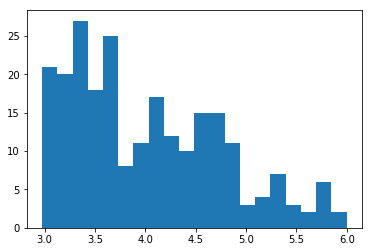

In [8]:
a = plt.hist(lya_zs, bins=20)

In [10]:
download = True
n_lya = len(lya_ids)
for i in range(n_lya):
    filename = "spectrum_{}.fits.gz".format(lya_ids[i])
    url_filename = "http://data.muse-vlt.eu/MW_1-24/1d_spectra/{}".format(filename)
    print(filename)
    if(not os.path.isfile(filename)):
        !wget $url_filename

spectrum_101005016.fits.gz
spectrum_101009024.fits.gz
spectrum_101010025.fits.gz
spectrum_101011026.fits.gz
spectrum_101012027.fits.gz
spectrum_101015031.fits.gz
spectrum_101016032.fits.gz
spectrum_101023043.fits.gz
spectrum_101024044.fits.gz
spectrum_101025045.fits.gz
spectrum_101026046.fits.gz
spectrum_101027047.fits.gz
spectrum_101030050.fits.gz
spectrum_102012085.fits.gz
spectrum_102013086.fits.gz
spectrum_102014087.fits.gz
spectrum_102015088.fits.gz
spectrum_102019097.fits.gz
spectrum_102046172.fits.gz
spectrum_102049176.fits.gz
spectrum_103001001.fits.gz
spectrum_103002002.fits.gz
spectrum_103005045.fits.gz
spectrum_103006046.fits.gz
spectrum_103008055.fits.gz
spectrum_103009056.fits.gz
spectrum_103010057.fits.gz
spectrum_103011058.fits.gz
spectrum_103018081.fits.gz
spectrum_103019082.fits.gz
spectrum_103026097.fits.gz
spectrum_103031105.fits.gz
spectrum_103032106.fits.gz
spectrum_103033107.fits.gz
spectrum_103034108.fits.gz
spectrum_103044120.fits.gz
spectrum_103050126.fits.gz
s

### Emline Table

In [11]:
hdul = fits.open('MW_1-24_emline_table.fits')
hdul.info()

Filename: MW_1-24_emline_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     81   1652R x 27C   [10A, I, I, I, 5A, 27A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L]   


In [12]:
data = hdul[1].data
hdul.close()

In [13]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '10A'
    name = 'POINTING_ID'; format = 'I'
    name = 'OBJ_ID'; format = 'I'
    name = 'RID'; format = 'I'
    name = 'IDENT'; format = '5A'
    name = 'COMMENT'; format = '27A'
    name = 'SN'; format = 'D'
    name = 'RA_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_SN'; format = 'D'; unit = 'Angstrom'
    name = 'RA_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_PEAK_SN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MIN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MAX'; format = 'D'; unit = 'Angstrom'
    name = 'RA_1MOM'; format = 'D'; unit = 'deg'
    name = 'DEC_1MOM'; format = 'D'; unit = 'deg'
    name = 'R_KRON'; format = 'D'; unit = 'arcsec'
    name = 'F_KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_2KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_3KRON'; format = 'D'; unit = 'c

In [17]:
# Filter by previous uids

lya_peak, lya_min, lya_max = [], [], []

for d in data:
    if ((d['UNIQUE_ID'] in lya_ids) and ('Lya' == d['IDENT'])):
        lya_peak.append(d['LAMBDA_PEAK_SN']) # angstroms 
        lya_min.append(d['LAMBDA_NB_MIN']) # angstroms 
        lya_max.append(d['LAMBDA_NB_MAX']) # angstroms 

In [18]:
print(lya_ids)
print(lya_zs)
print(lya_peak)
print(lya_min)
print(lya_max)

['101005016' '101009024' '101010025' '101011026' '101012027' '101015031'
 '101016032' '101023043' '101024044' '101025045' '101026046' '101027047'
 '101030050' '102012085' '102013086' '102014087' '102015088' '102019097'
 '102046172' '102049176' '103001001' '103002002' '103005045' '103006046'
 '103008055' '103009056' '103010057' '103011058' '103018081' '103019082'
 '103026097' '103031105' '103032106' '103033107' '103034108' '103044120'
 '103050126' '104004029' '104007038' '104009041' '104012048' '104014050'
 '104015052' '104019059' '104024069' '104032086' '105005027' '105007031'
 '105009034' '106003018' '106004019' '106007033' '106008034' '106009035'
 '106012043' '106014046' '106015047' '106019055' '106021059' '106025070'
 '106027072' '106032083' '106035088' '107004077' '107008086' '107015098'
 '107016099' '107024120' '107033150' '107034151' '107041159' '108006104'
 '108009107' '108010108' '108017130' '108030156' '109003027' '109004028'
 '109006034' '109008036' '109009037' '109010038' '1

### Spectra

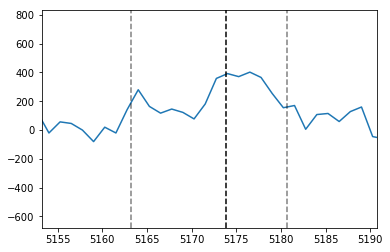

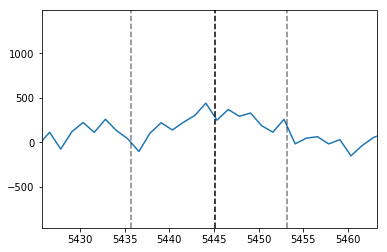

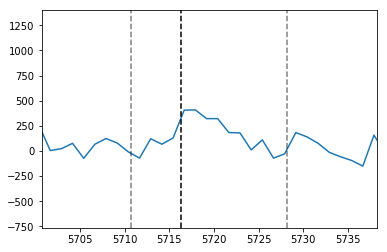

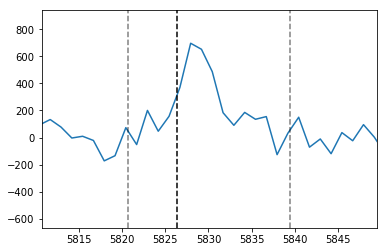

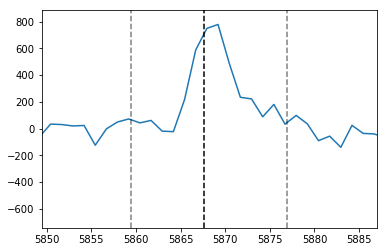

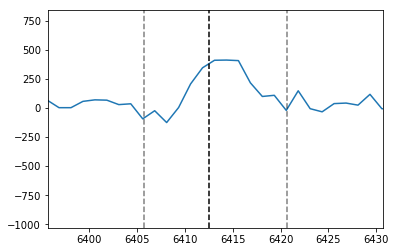

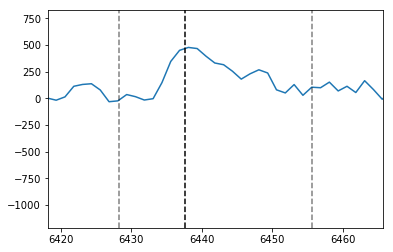

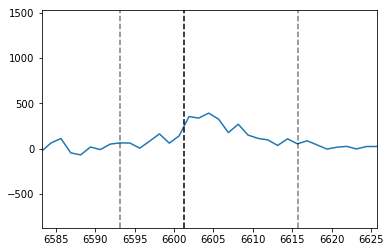

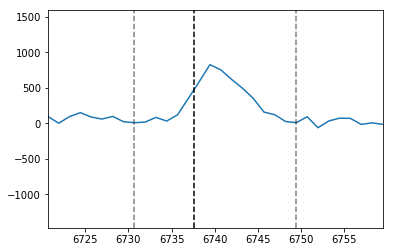

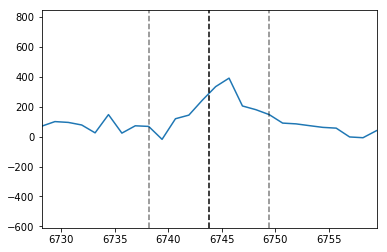

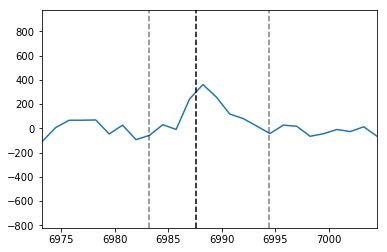

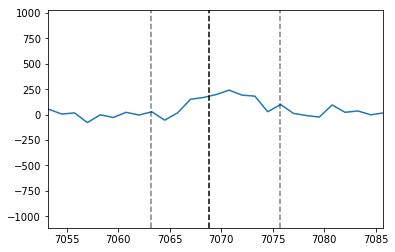

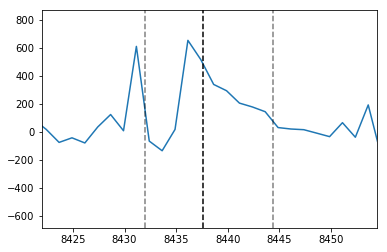

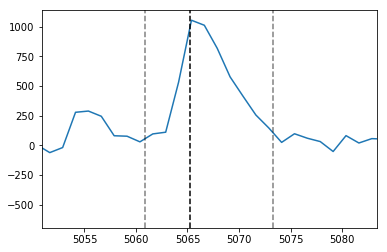

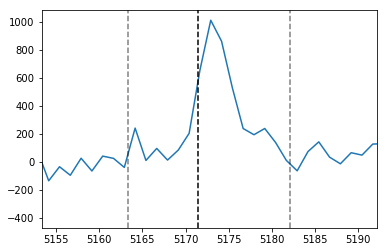

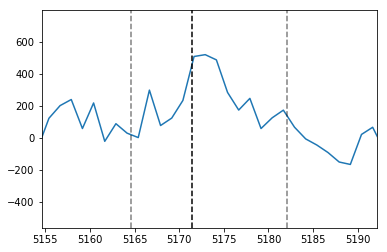

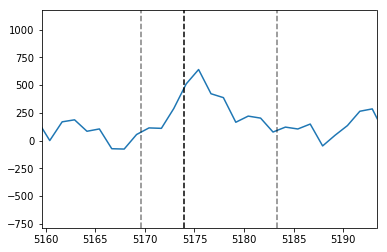

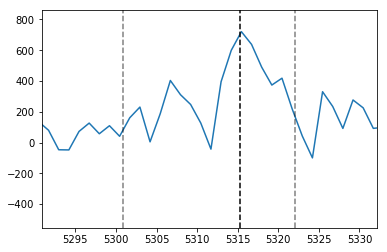

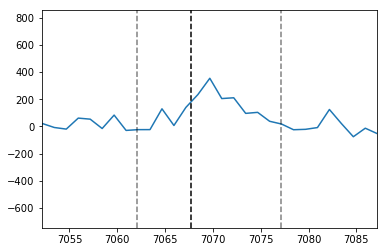

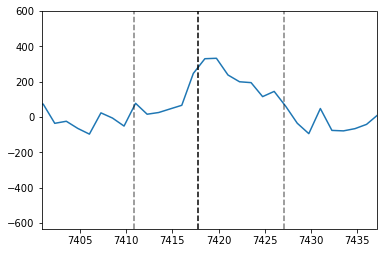

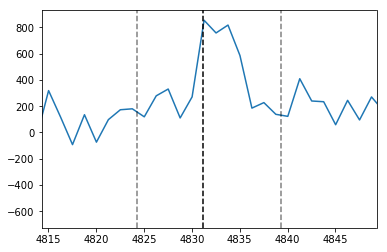

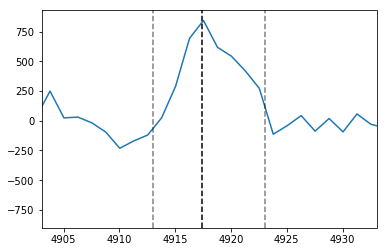

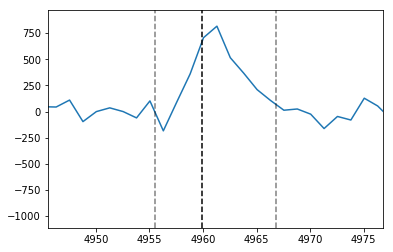

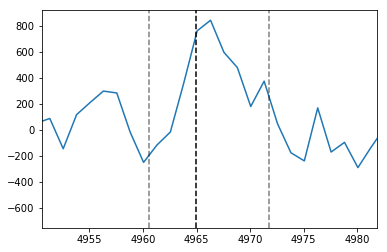

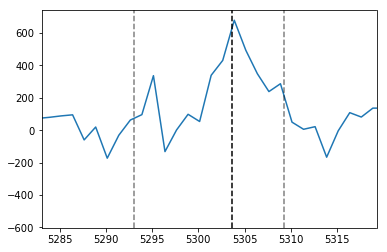

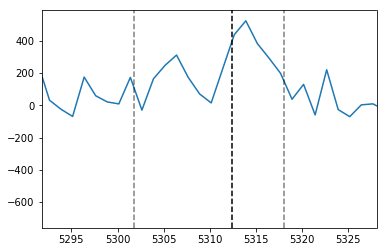

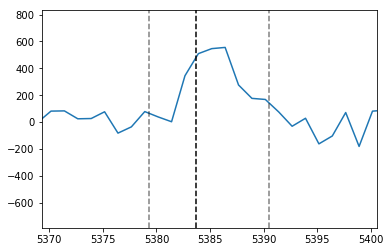

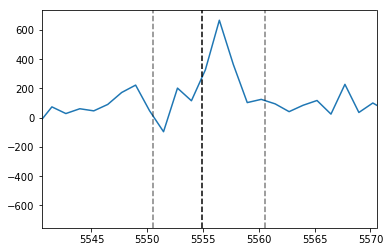

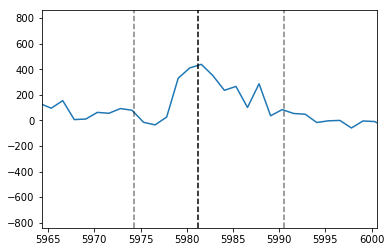

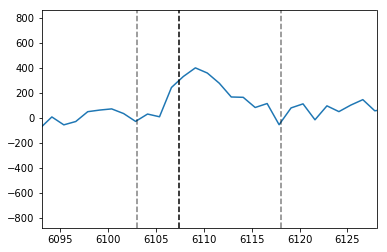

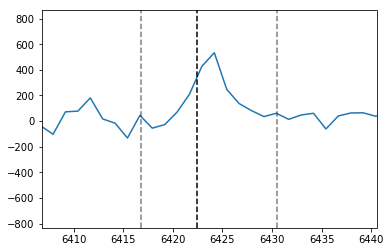

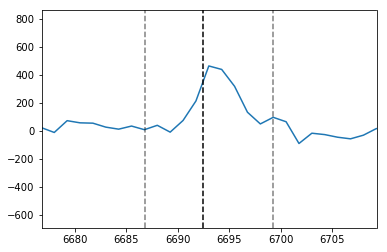

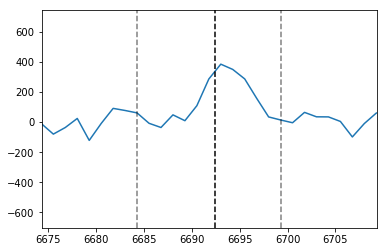

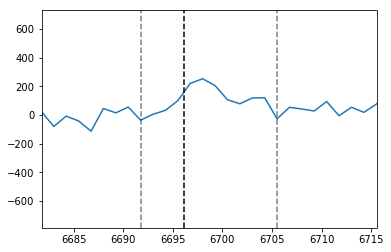

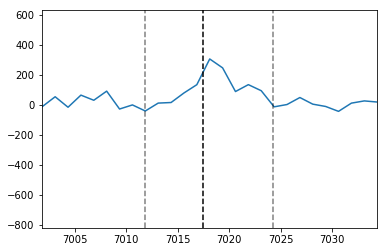

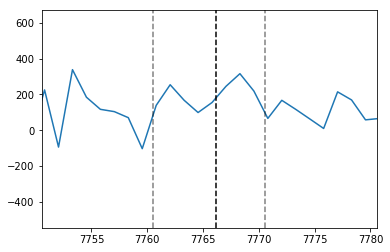

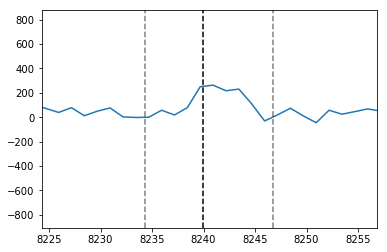

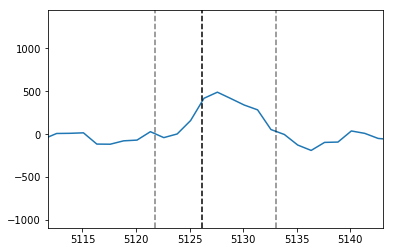

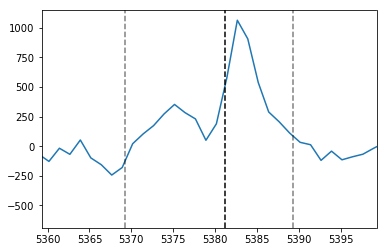

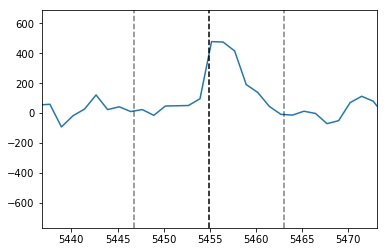

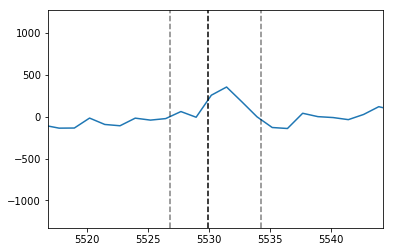

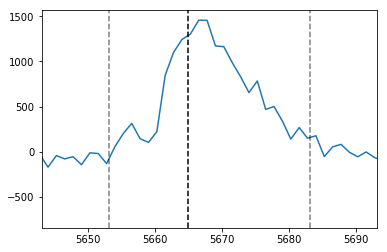

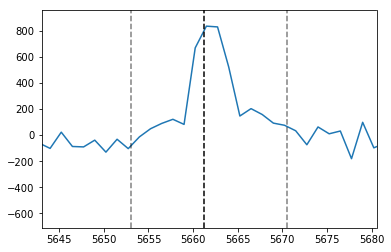

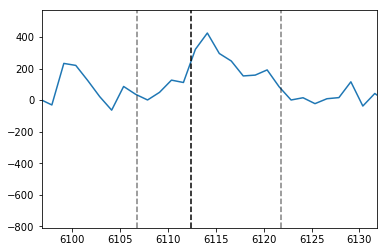

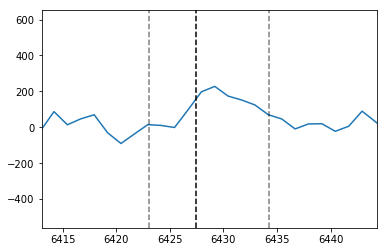

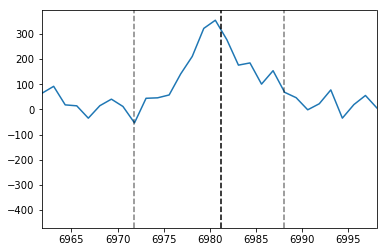

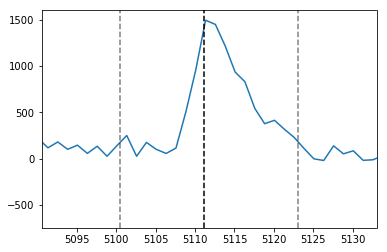

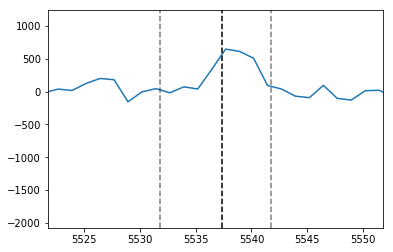

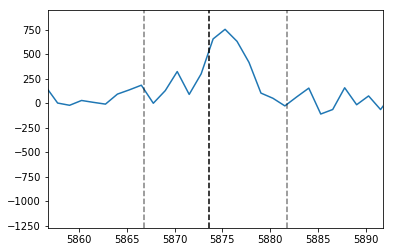

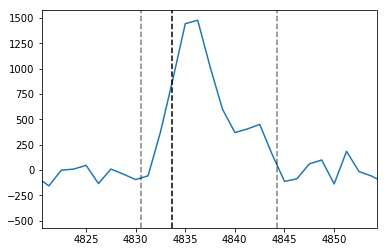

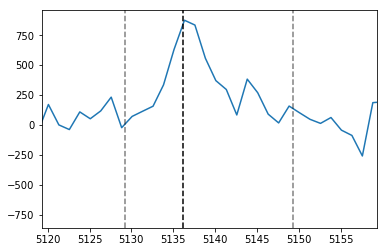

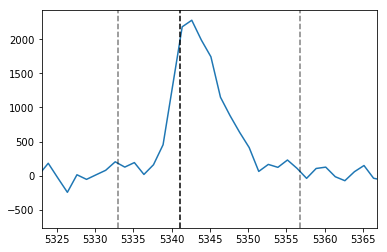

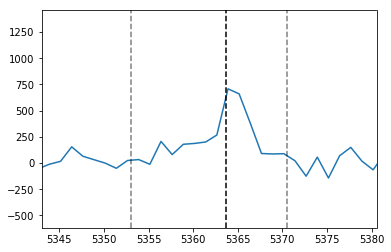

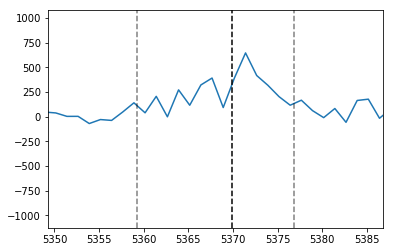

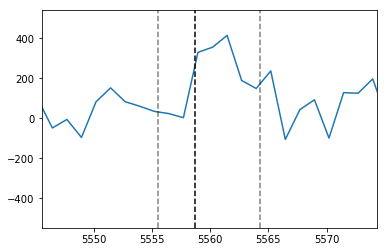

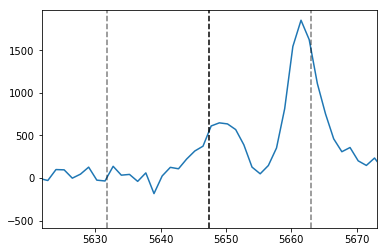

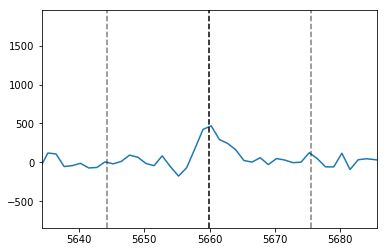

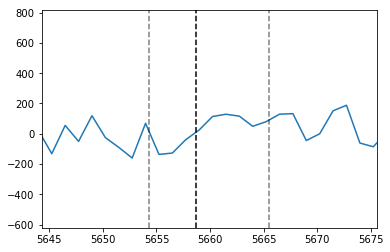

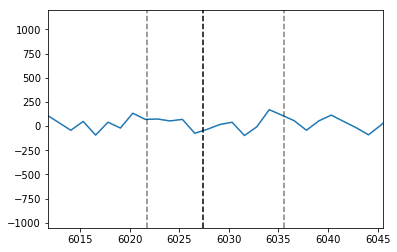

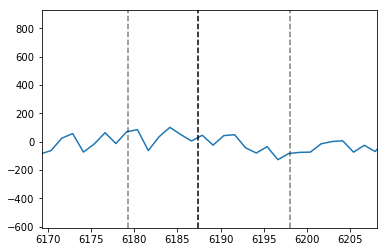

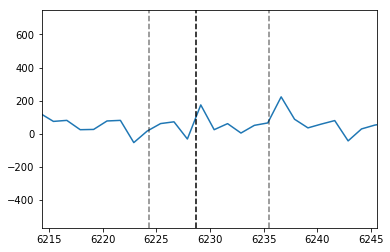

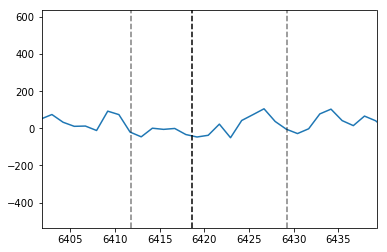

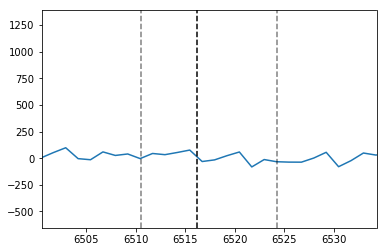

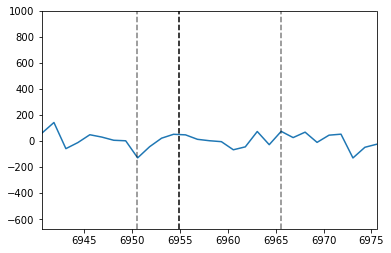

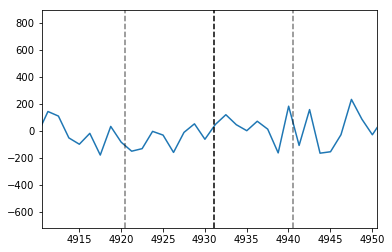

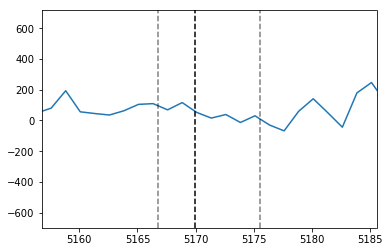

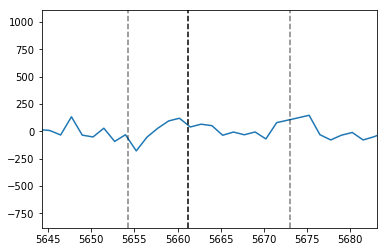

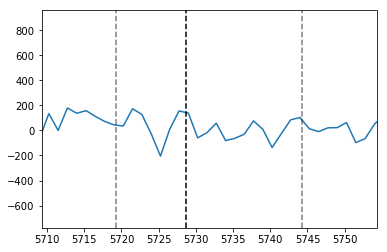

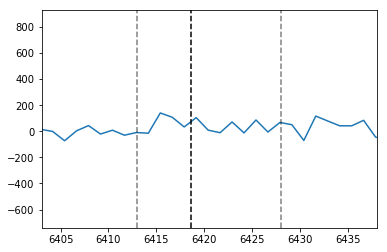

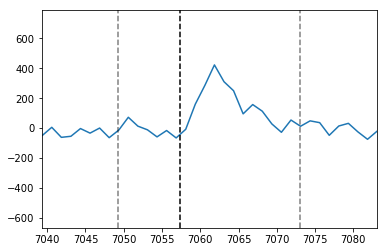

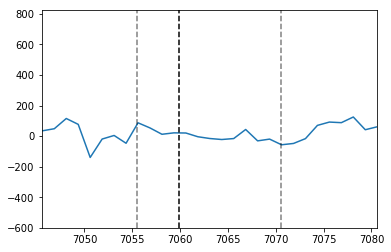

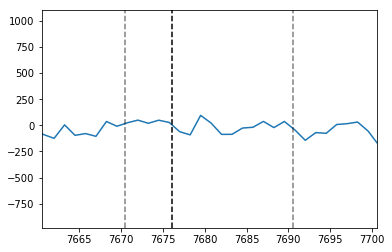

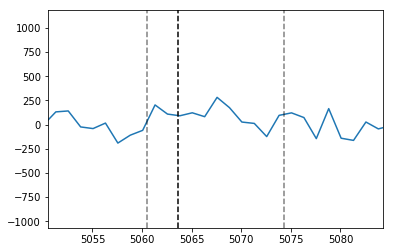

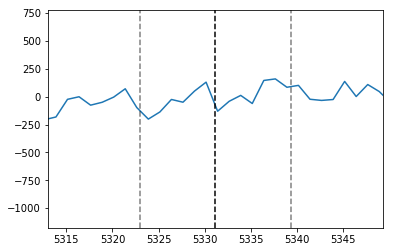

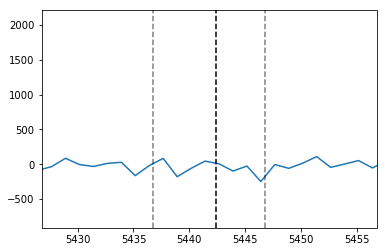

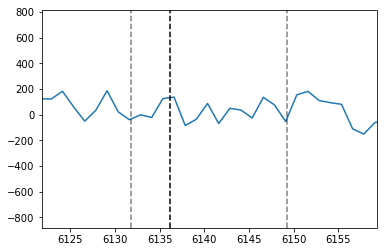

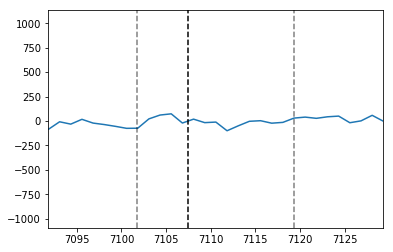

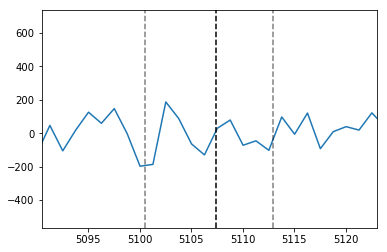

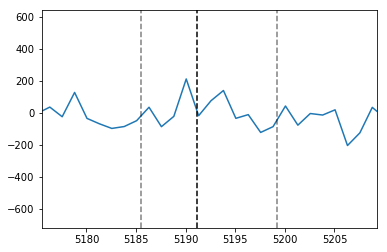

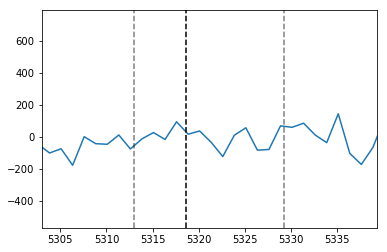

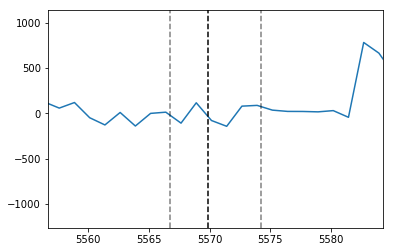

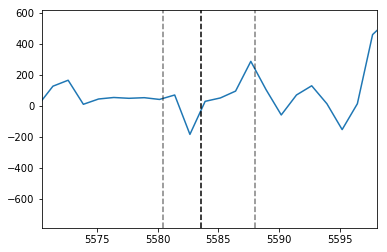

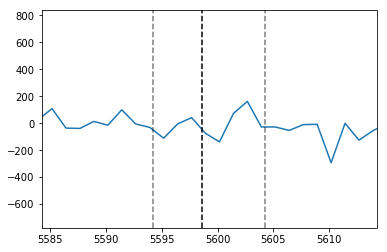

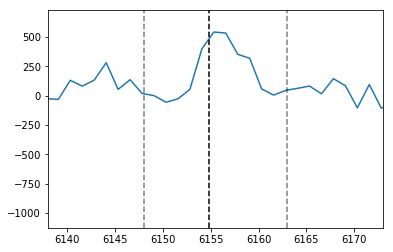

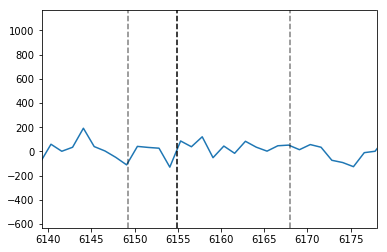

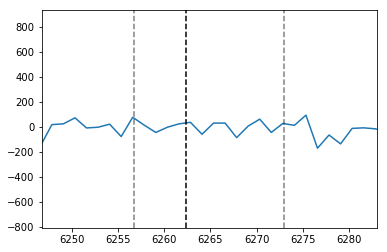

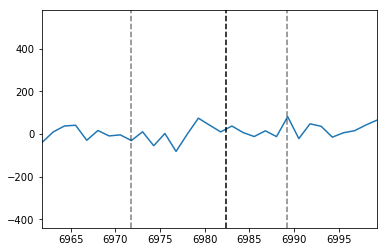

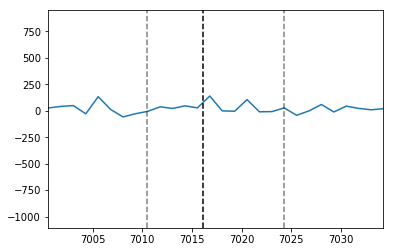

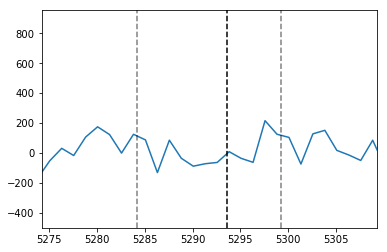

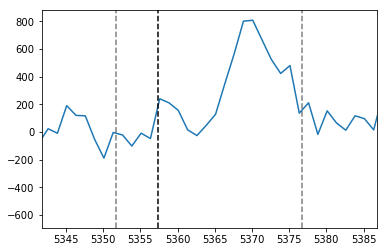

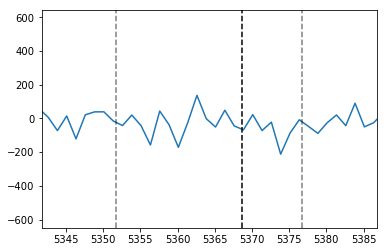

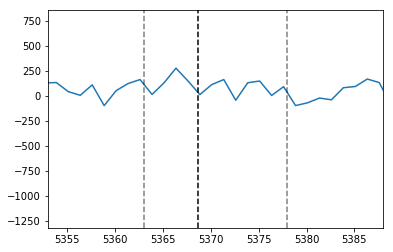

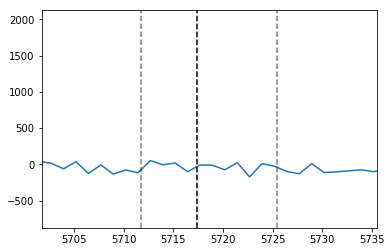

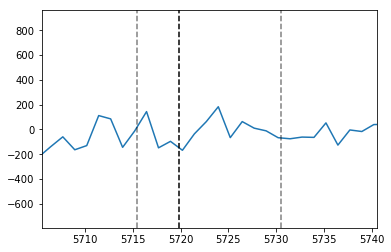

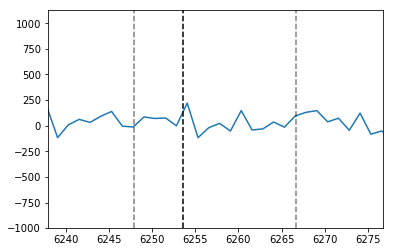

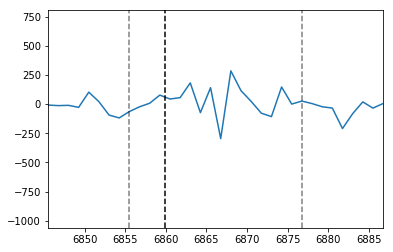

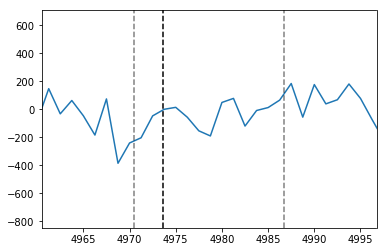

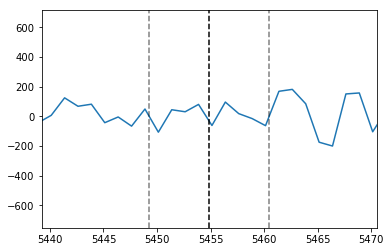

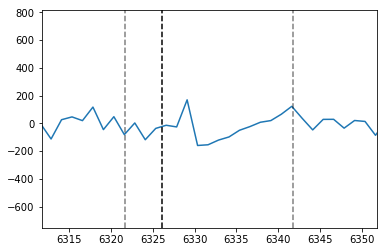

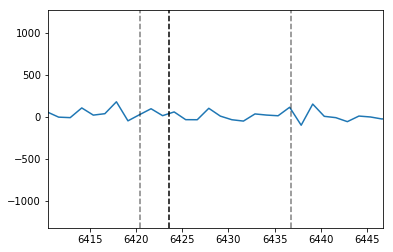

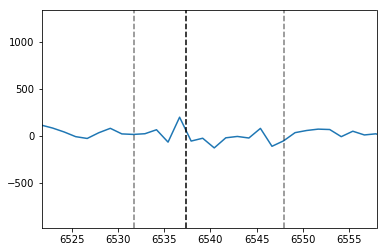

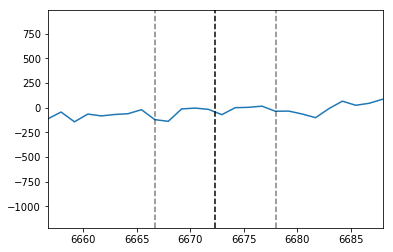

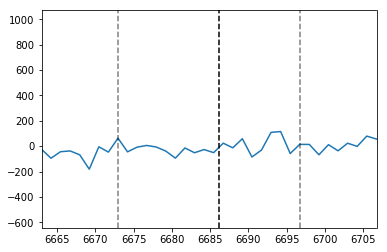

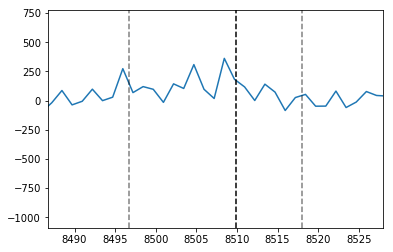

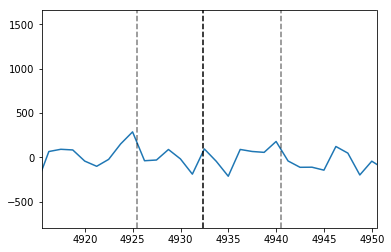

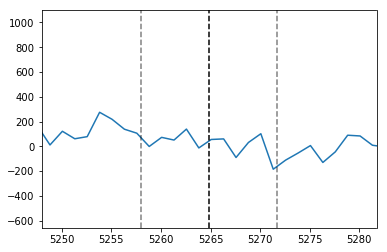

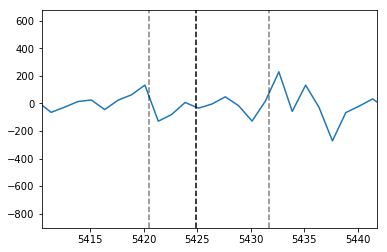

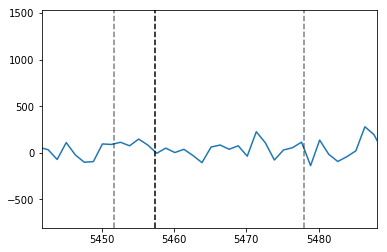

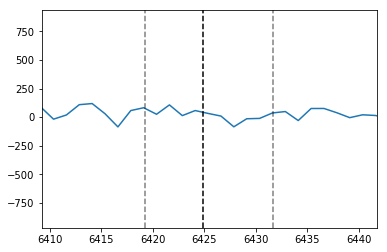

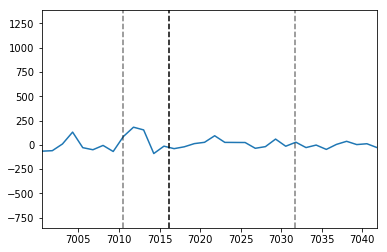

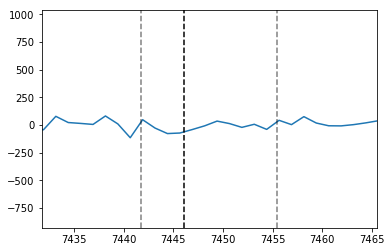

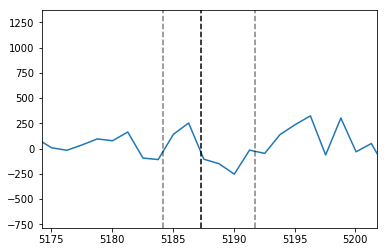

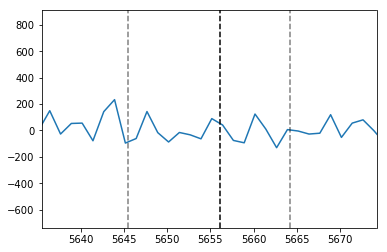

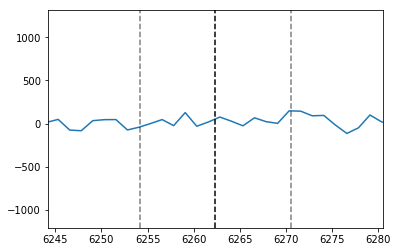

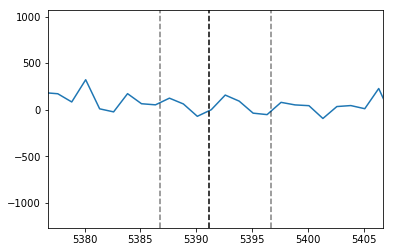

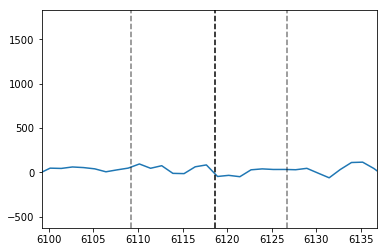

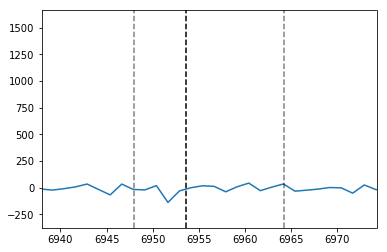

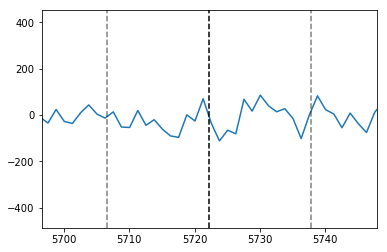

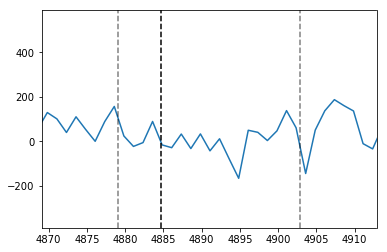

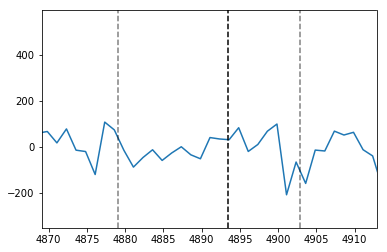

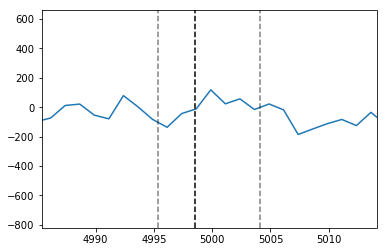

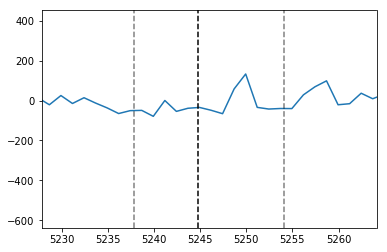

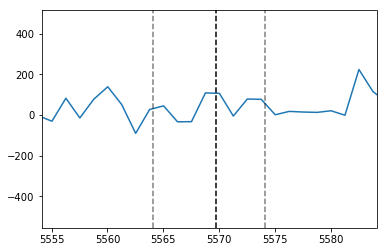

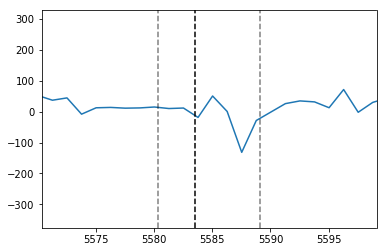

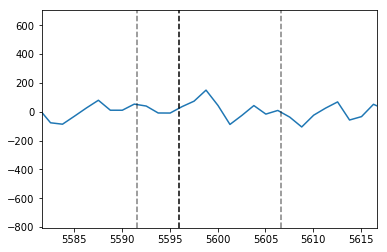

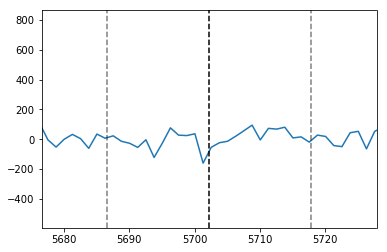

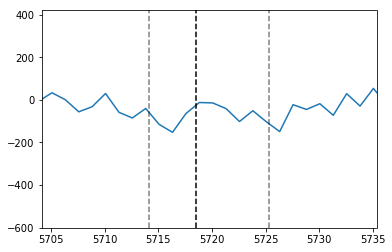

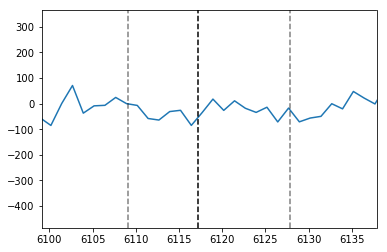

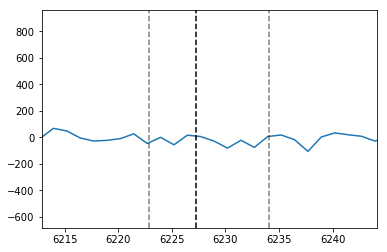

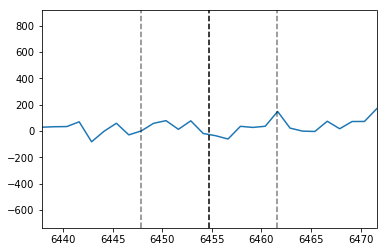

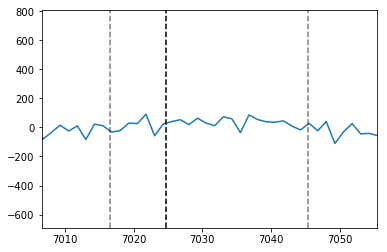

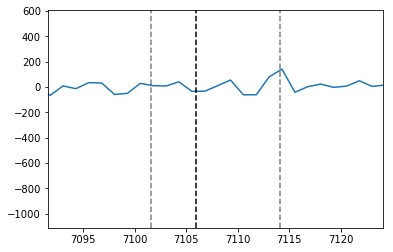

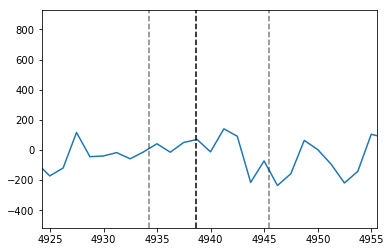

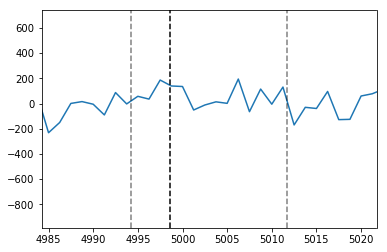

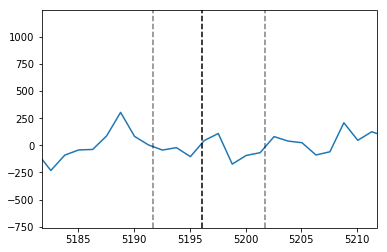

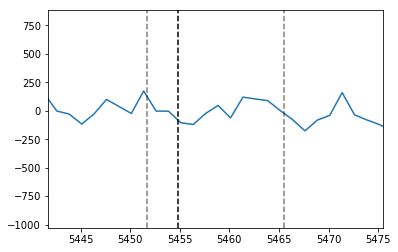

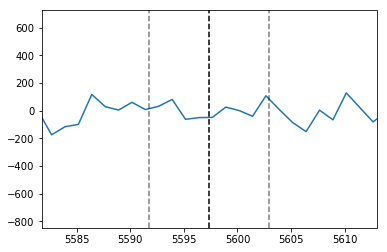

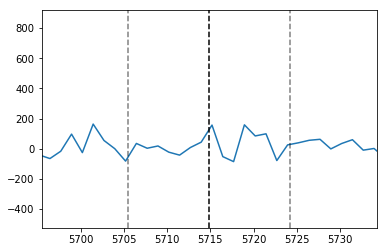

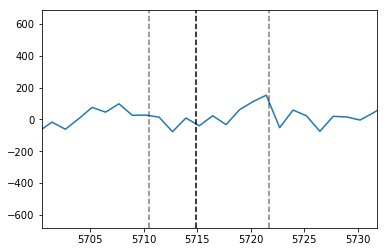

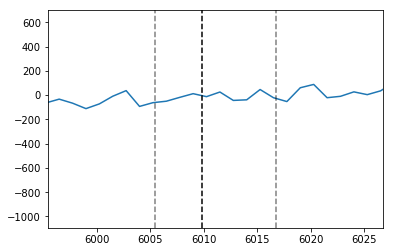

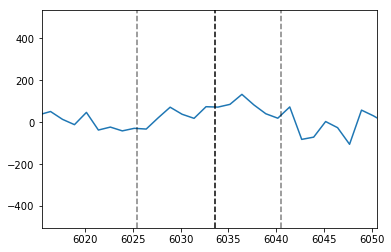

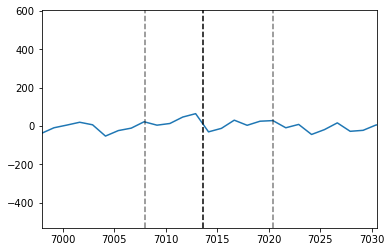

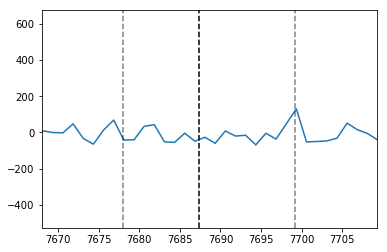

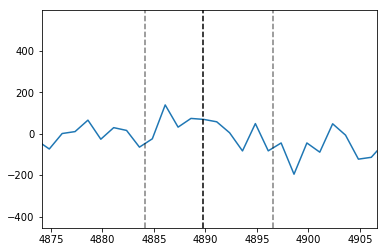

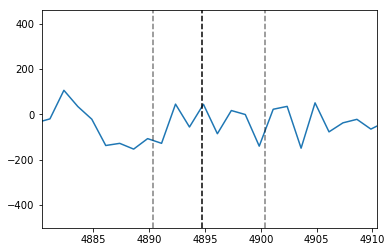

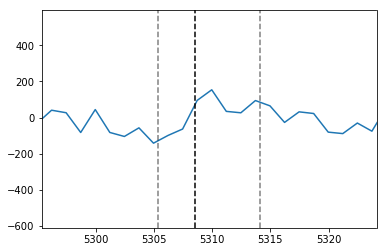

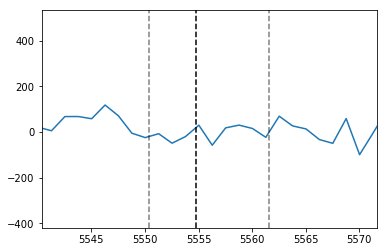

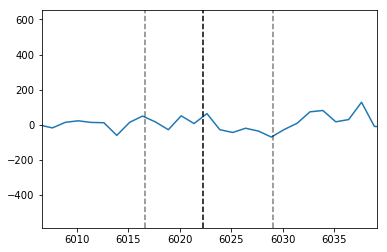

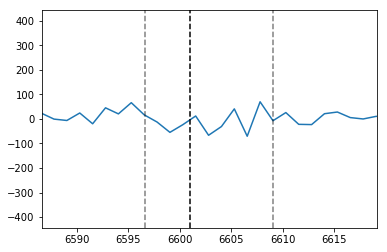

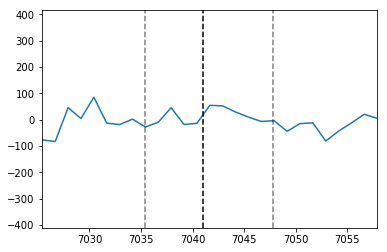

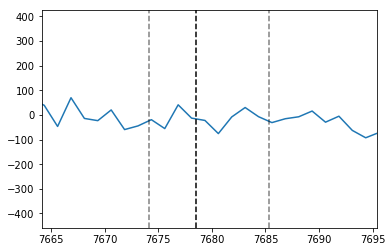

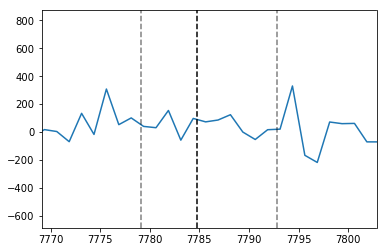

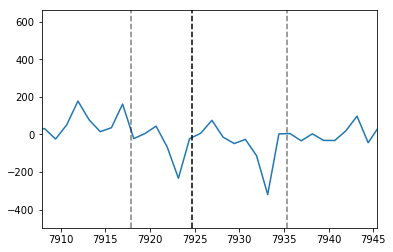

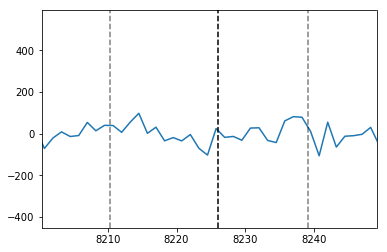

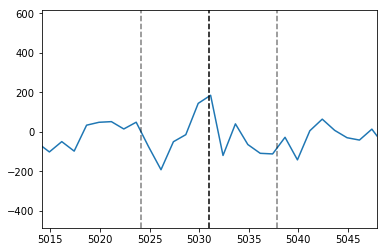

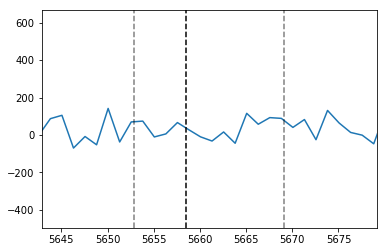

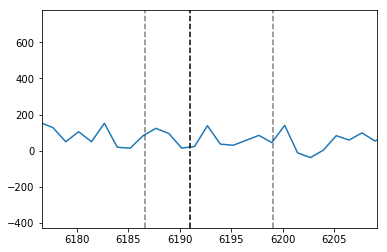

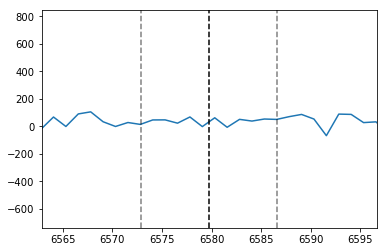

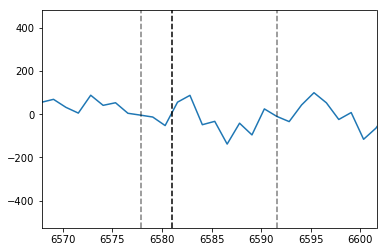

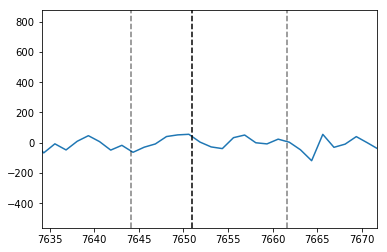

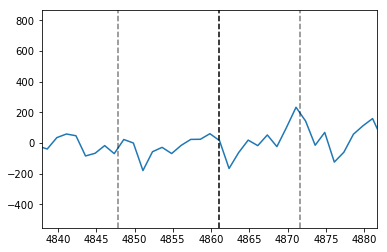

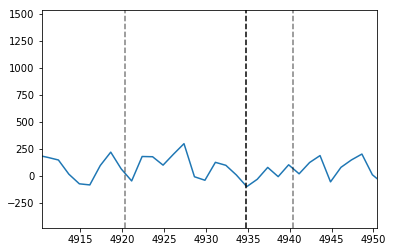

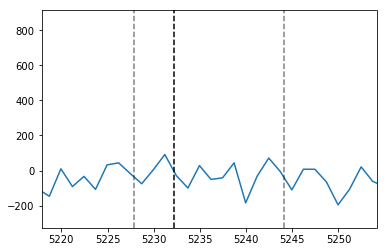

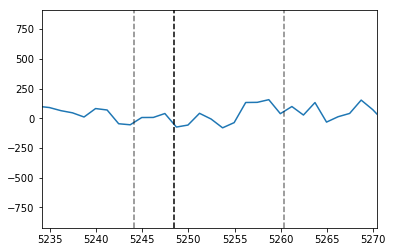

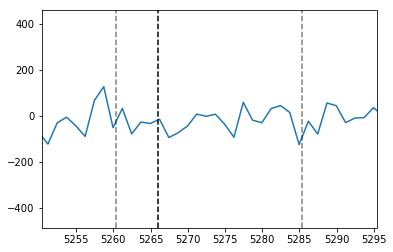

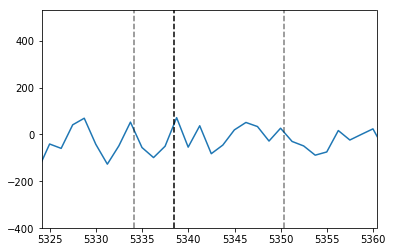

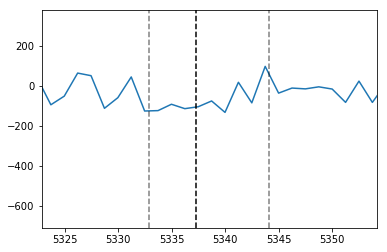

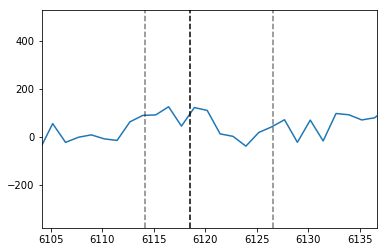

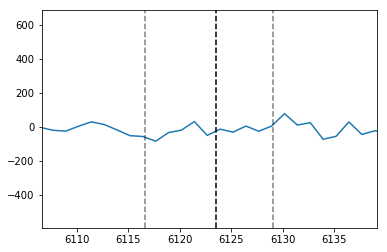

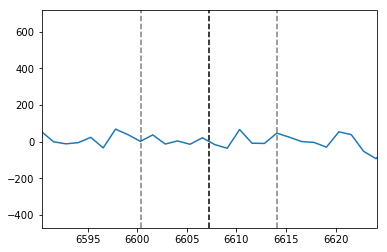

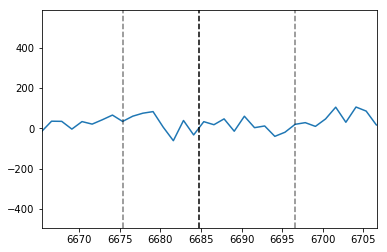

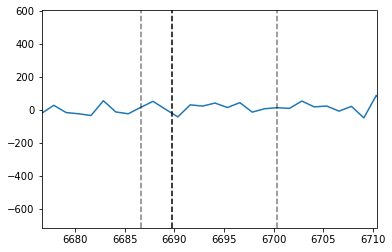

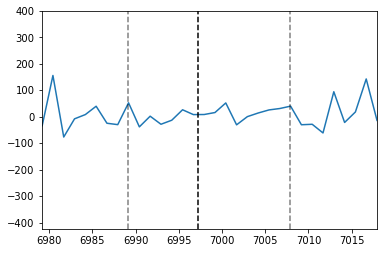

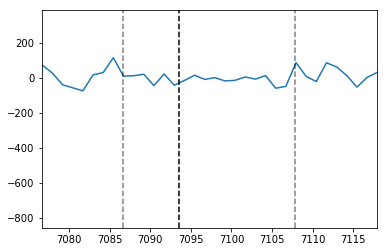

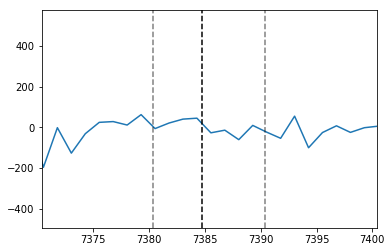

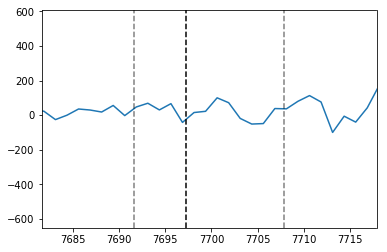

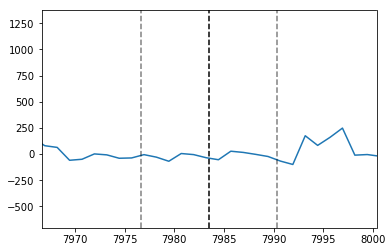

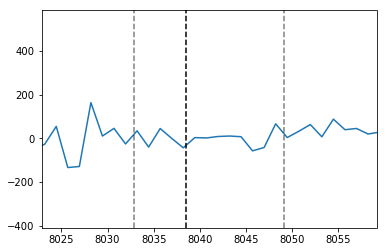

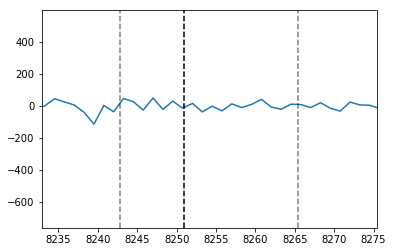

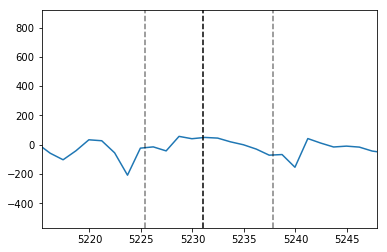

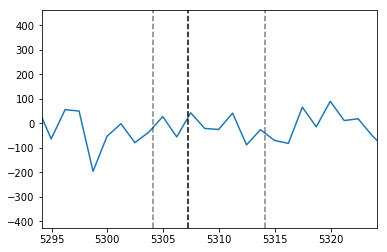

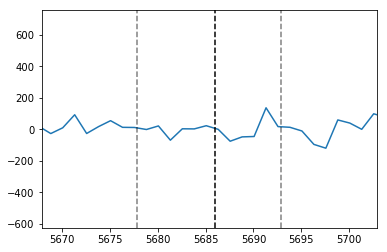

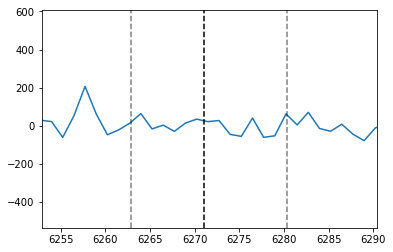

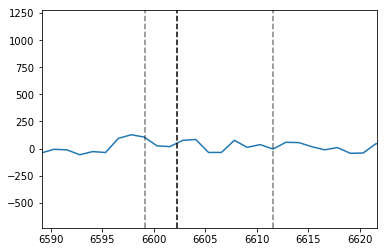

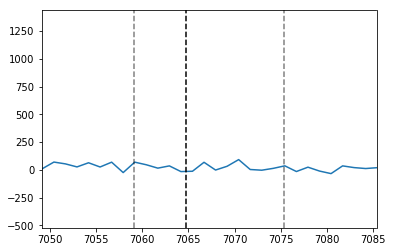

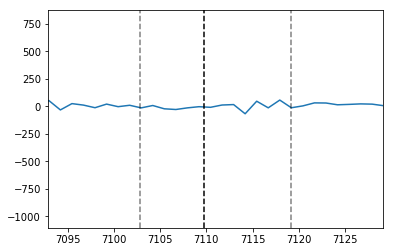

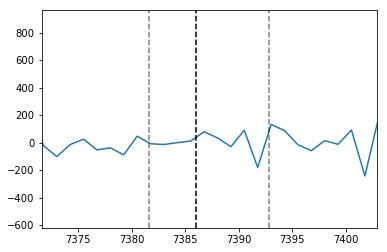

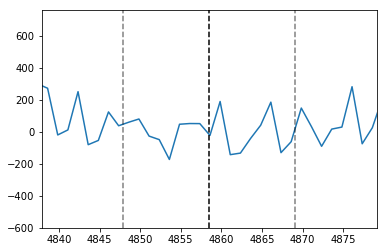

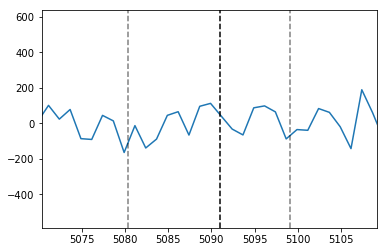

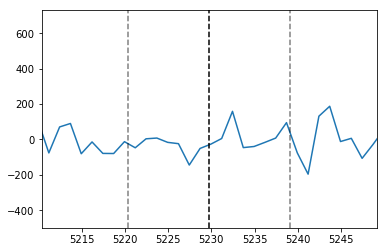

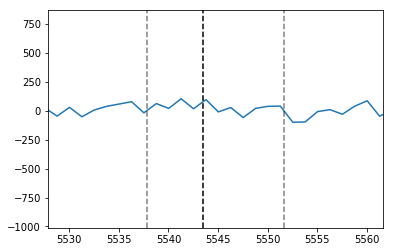

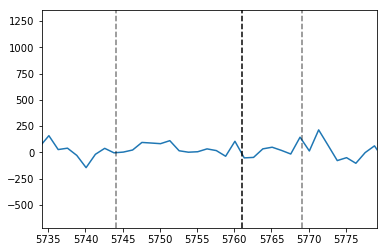

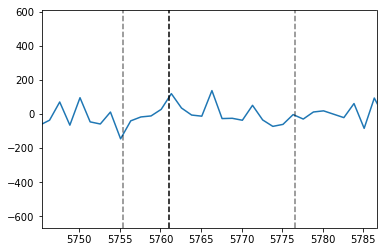

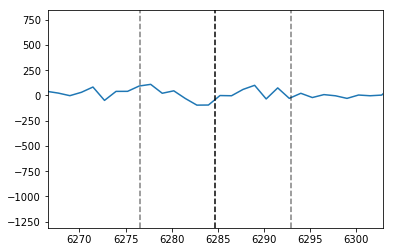

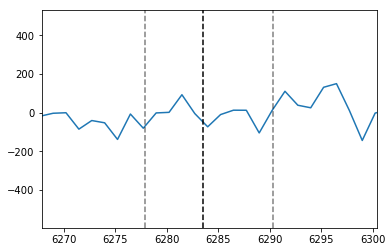

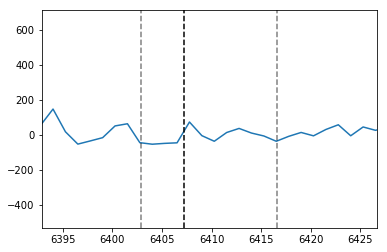

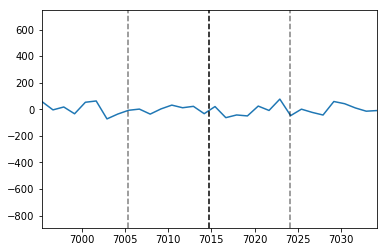

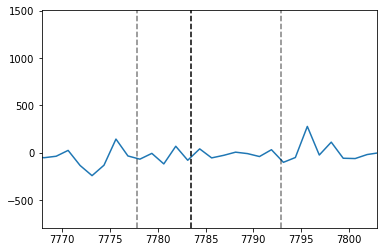

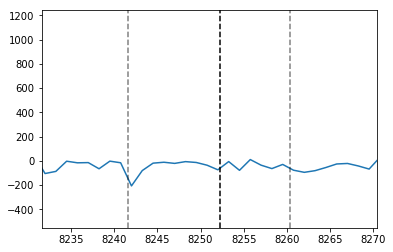

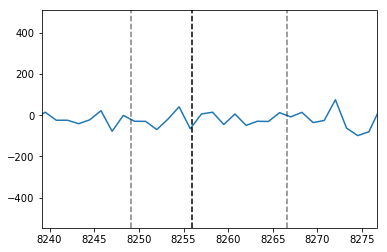

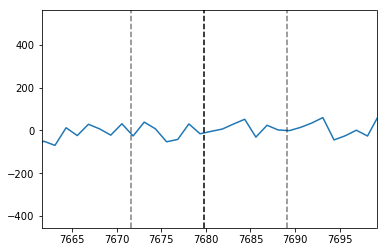

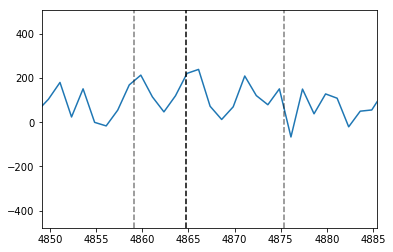

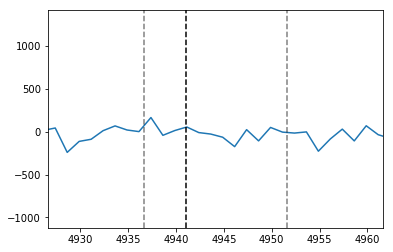

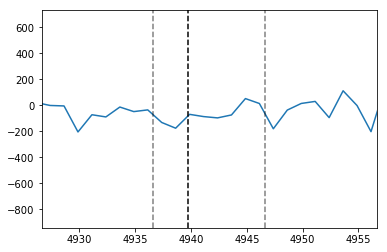

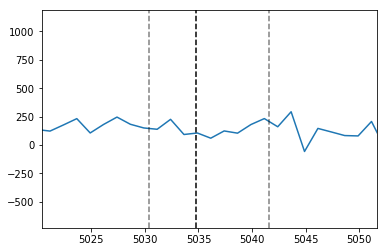

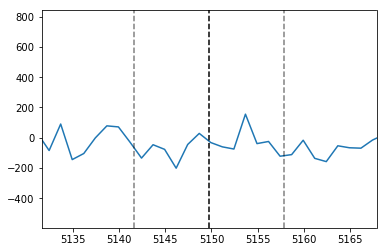

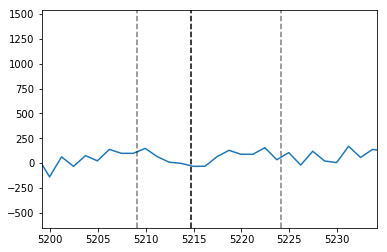

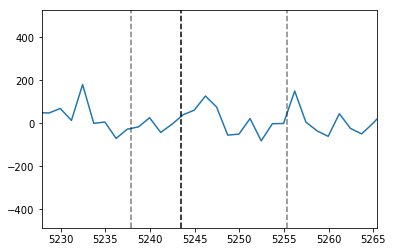

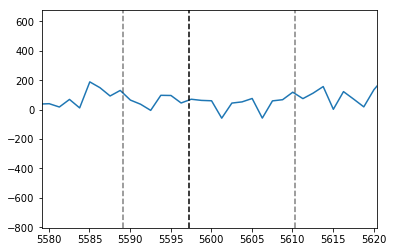

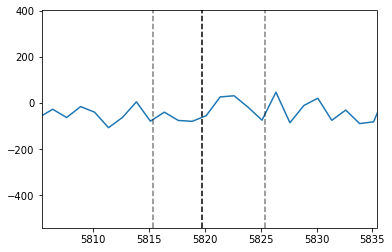

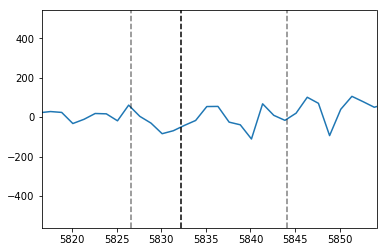

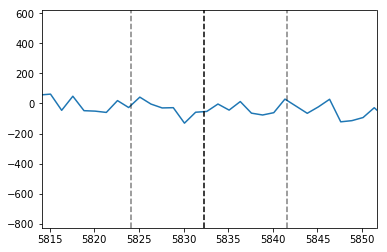

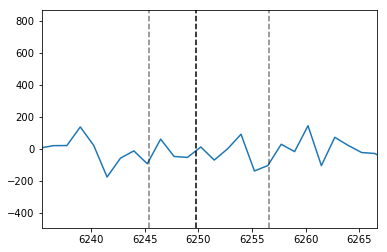

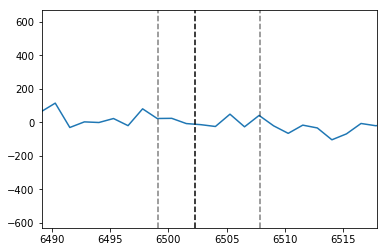

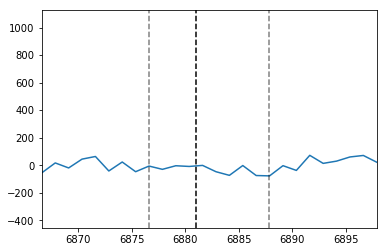

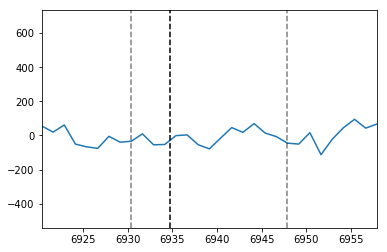

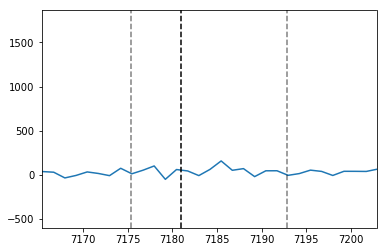

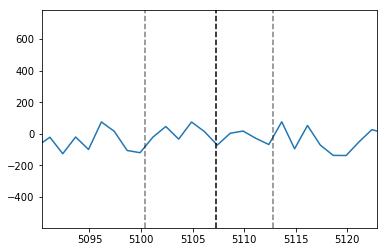

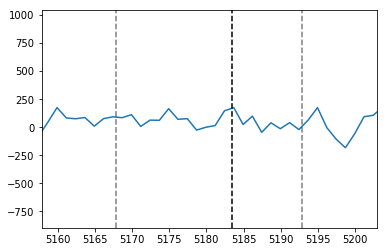

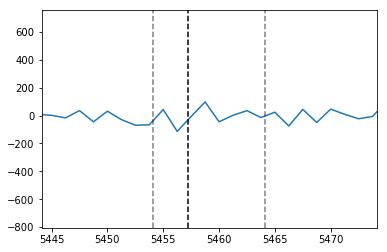

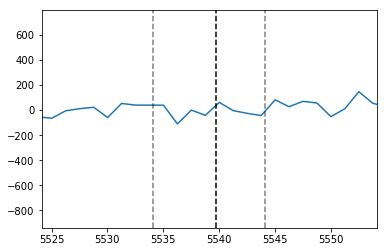

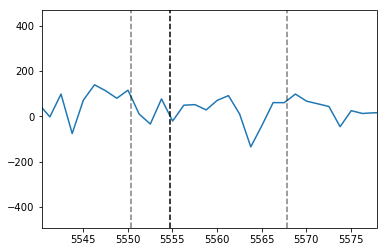

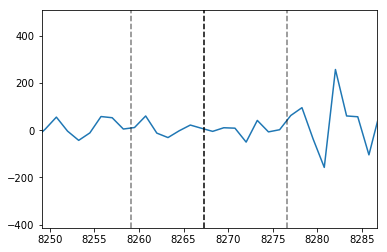

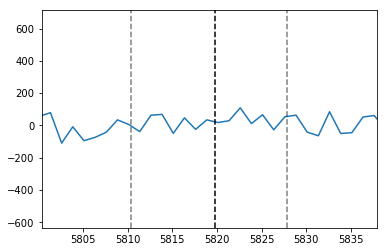

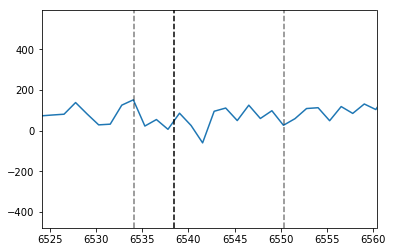

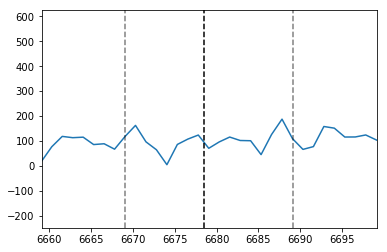

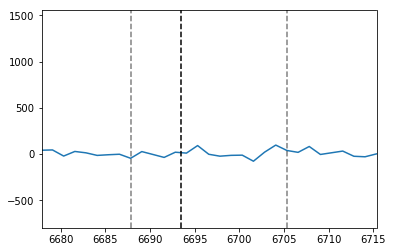

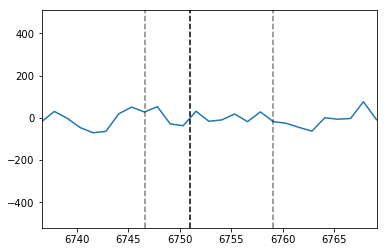

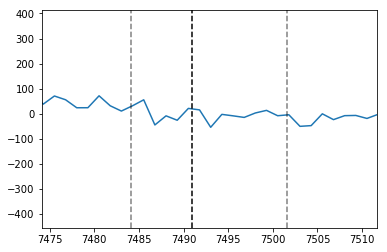

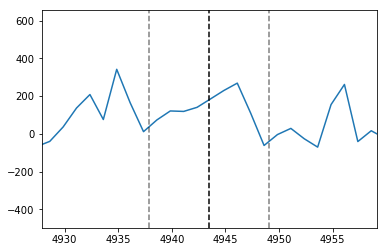

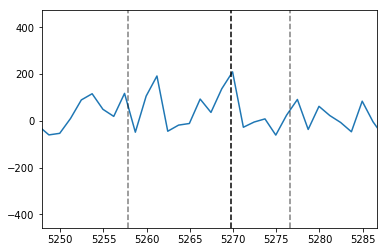

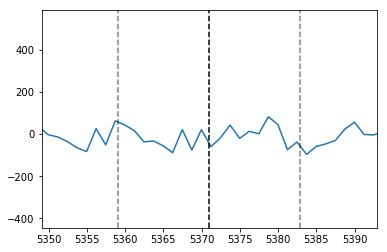

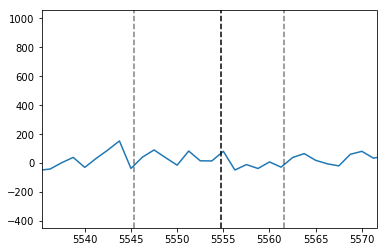

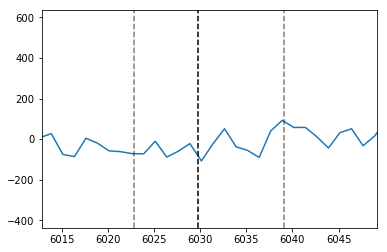

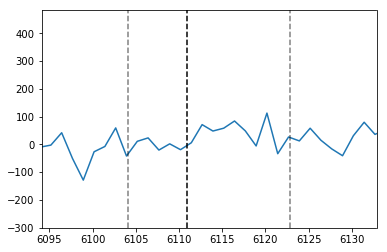

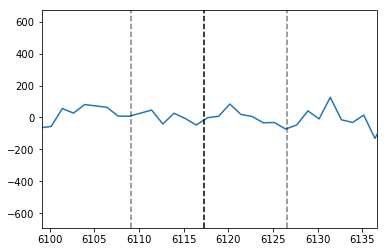

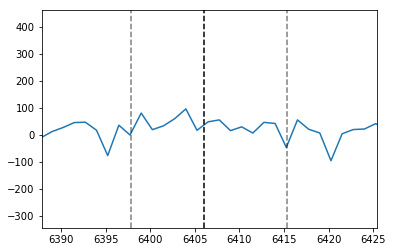

In [19]:
lya_xs, lya_ys = [], []

n_lya = len(lya_ids)
for i in range(n_lya):
    fn = 'spectrum_' + str(lya_ids[i]) + '.fits.gz'
    hdul = fits.open(fn)
    data = hdul[1].data
    hdul.close()
    
    x = data['WAVE_VAC'] # angstroms 
    y = data['FLUX']
    z = lya_zs[i]
    
    peak = lya_peak[i]
    minn = lya_min[i]
    maxx = lya_max[i]
    
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-10, maxx+10)
    plt.show()
    
    # redshift
    x = x/(1+z) 
    peak = peak/(1+z)
    minn = minn/(1+z)
    maxx = maxx/(1+z)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # angstrom to velocity (km/s)
    x = c*(1 - lya_lambda/x)
    peak = c*(1 - lya_lambda/peak)
    minn = c*(1 - lya_lambda/minn)
    maxx = c*(1 - lya_lambda/maxx)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(peak-1000, peak+1000)
    plt.show()
    '''
    
    # center
    x = x - peak
    minn = minn - peak
    maxx = maxx - peak
    peak = 0
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # save them
    lya_peak[i] = peak
    lya_min[i] = minn
    lya_max[i] = maxx
    
    lya_xs.append(x)
    lya_ys.append(y)

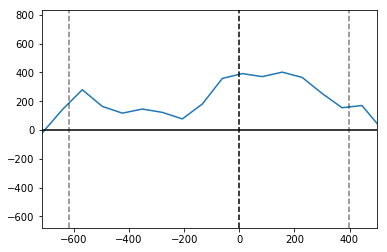

In [20]:
plt.plot(lya_xs[0], lya_ys[0])
plt.xlim(lya_min[0]-100, lya_max[0]+100)
plt.axvline(lya_peak[0], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

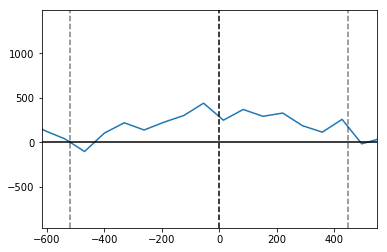

In [21]:
plt.plot(lya_xs[1], lya_ys[1])
plt.xlim(lya_min[1]-100, lya_max[1]+100)
plt.axvline(lya_peak[1], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

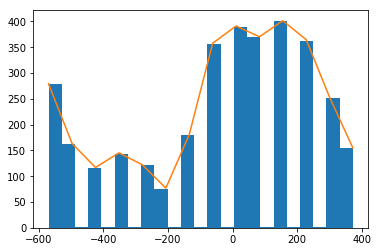

ValueError: Number of samples, -103, must be non-negative.

In [22]:
lya_stds, lya_skws = [], []

n_lya = len(lya_ids)
for i in range(n_lya):
    x = lya_xs[i]
    y = lya_ys[i]
    
    inds_sub = np.where((x>=lya_min[i]) & (x<=lya_max[i]))
    
    x_sub = x[inds_sub]
    y_sub = y[inds_sub]
    
    n, b = np.histogram(x_sub, weights=y_sub, bins=23)
    
    vs = np.array([])
    for j in range(len(n)):
        n_j = int(n[j])
        b_prev = b[j]
        b_next = b[j+1]
        
        vs_j = np.linspace(b_prev, b_next, n_j)
        vs = np.concatenate((vs, vs_j))
    
    plt.hist(vs, bins=23)
    plt.plot(x_sub, y_sub)
    plt.show()

    std_i = np.std(vs)
    skw_i = skew(vs)
    
    lya_stds.append(std_i)
    lya_skws.append(skw_i)
    
    #y_sub = y_sub/np.sum(y_sub)
    #sub = np.array([x_sub, y_sub]).T
    #fn = 'muse_lya_' + str(lya_ids[i]) + '.txt'
    #np.savetxt(fn, sub)

In [55]:
stats = np.array([lya_stds, lya_skws]).T
np.savetxt('muse_stats.txt', stats) # std, skw